<a href="https://colab.research.google.com/github/GastonRAraujo/Materia-Ap_Maq/blob/master/TP3/TP3_Ejercicio2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Usaremos las siguientes bibliotecas
# Datos
import numpy as np 
import pandas as pd 

# Viz
import seaborn as sns
import matplotlib.pyplot as plt

#Utilidad
from sklearn.model_selection import train_test_split

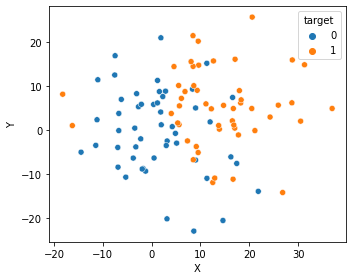

In [ ]:
N = 50                    #si deseeo que sean igual cantidades
                           # determino un N y lo reparto partes iguales

#Creo el dataset A

# Semilla aletoria
np.random.seed(1)
features_number = 2
dummy_df_A = pd.DataFrame(np.random.normal(scale=10, size=(N, features_number)),
                        columns=['X', 'Y'])

dummy_df_A['target'] = 0


#Creo el dataset B

# Semilla aletoria
np.random.seed(546)
features_number = 2
dummy_df_B = pd.DataFrame(np.random.normal(loc = [10,5], scale=10, size=(N, features_number)),
                        columns=['X', 'Y'])

dummy_df_B['target'] = 1

dummy_df = pd.concat([dummy_df_A, dummy_df_B], ignore_index=True)

target_names = ['A', 'B']


plt.figure(figsize=(5, 4))
sns.scatterplot(x="X", y="Y", data=dummy_df, hue = dummy_df['target'])

plt.tight_layout()
plt.show()

In [ ]:
X = np.array(dummy_df[['X','Y']])
y = dummy_df['target'].tolist()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

n_neighbors=[1,5,10,15,20,30,40]
p = [1,2]

param_grid = dict(n_neighbors=n_neighbors, p=p)


knn = KNeighborsClassifier()

gs = GridSearchCV(knn, param_grid, cv = 10,)


gs_result = gs.fit(X_train, y_train)

In [ ]:
#Print The value of best Hyperparameters
print('Best p:', gs_result.best_estimator_.get_params()['p'])
print('Best n_neighbors:',gs_result.best_estimator_.get_params()['n_neighbors'])

Best p: 2
Best n_neighbors: 20


(-18.30829136536186, 37.0813824316018, -23.115386968802827, 25.816201189690467)

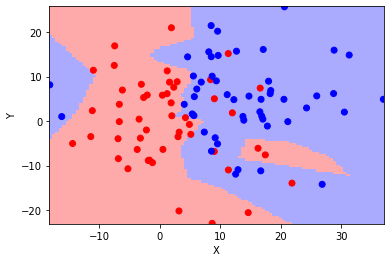

In [ ]:
from matplotlib.colors import ListedColormap

cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])

knn = KNeighborsClassifier(n_neighbors=1, p=2)
knn.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])



Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('tight')

In [ ]:
#Predigo usando X_test
y_predicted = knn.predict(X_test)

In [ ]:
from sklearn import metrics
print("Classification report for classifier {}\n{}\n".format(knn, metrics.classification_report(y_test, y_predicted)))

Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.95      0.70      0.81        30
           1       0.68      0.95      0.79        20

    accuracy                           0.80        50
   macro avg       0.82      0.82      0.80        50
weighted avg       0.84      0.80      0.80        50




Classification report for classifier KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')
              precision    recall  f1-score   support

           0       0.95      0.70      0.81        30
           1       0.68      0.95      0.79        20

    accuracy                           0.80        50
   macro avg       0.82      0.82      0.80        50
weighted avg       0.84      0.80      0.80        50




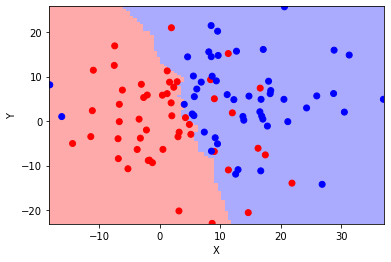

In [ ]:
knn2 = KNeighborsClassifier(n_neighbors=gs_result.best_estimator_.get_params()['n_neighbors'],
                           p=gs_result.best_estimator_.get_params()['p'])
knn2.fit(X_train, y_train)

x_min, x_max = X[:, 0].min() - .1, X[:, 0].max() + .1
y_min, y_max = X[:, 1].min() - .1, X[:, 1].max() + .1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))
Z = knn2.predict(np.c_[xx.ravel(), yy.ravel()])



Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold)
plt.xlabel('X')
plt.ylabel('Y')
plt.axis('tight')


#Predigo usando X_test
y_predicted = knn.predict(X_test)

print("Classification report for classifier {}\n{}\n".format(knn2, metrics.classification_report(y_test, y_predicted)))